# Exploration of raw data

Loading data into python for EDA.

## Loading and processing data

This notebook is intended to run in the root directory of the project.

In [1]:
%matplotlib inline

In [2]:
%cd ..

/project


In [3]:
import os
from pathlib import Path
from src.data import *

### Loading the raw data

The activities recorded are encoded as the following.

In [4]:
activities = load_activity_names(); activities

,activity_id,activity_name
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


The raw recorded data contains 9 signals, stored as 2.56s windows (128 points in each row). We load the data for either `train` or `test`.

In [5]:
raw_df = load_raw_data() \
    .merge(activities) \
    .drop('activity_id', axis=1) \
    .sort_values(['subject_id', 'time_exp']) \
    .reset_index(drop=True)
raw_df.shape

(470528, 12)

In [6]:
raw_df.head()

,subject_id,time_exp,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z,activity_name
0,1,0.00,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.012817,-0.123217,0.102934,STANDING
1,1,0.02,0.010139,0.006579,0.055125,0.043711,0.042699,0.010316,1.022833,-0.126876,0.105687,STANDING
2,1,0.04,0.009276,0.008929,0.048405,0.035688,0.074850,0.013250,1.022028,-0.124004,0.102102,STANDING
3,1,0.06,0.005066,0.007489,0.049775,0.040402,0.057320,0.017751,1.017877,-0.124928,0.106553,STANDING
4,1,0.08,0.010810,0.006141,0.043013,0.047097,0.052343,0.002553,1.023680,-0.125767,0.102814,STANDING


### Loading the feature data

The data provides a set of standard signal processing features. This is a total of 561 features. There are some duplicate fields, and we append the column index to their names.

In [7]:
features_df = load_feature_data() \
    .merge(activities) \
    .drop('activity_id', axis=1) \
    .sort_values(['subject_id', 'time_exp']) \
    .reset_index(drop=True)
features_df.shape

(7352, 564)

In [8]:
features_df.head()

,subject_id,time_exp,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity_name
0,1,0.00,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,1,1.28,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,1,2.56,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,1,3.84,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,1,5.12,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


## Time series plots per subject

One at a time, but also for all subjects in separate plots.

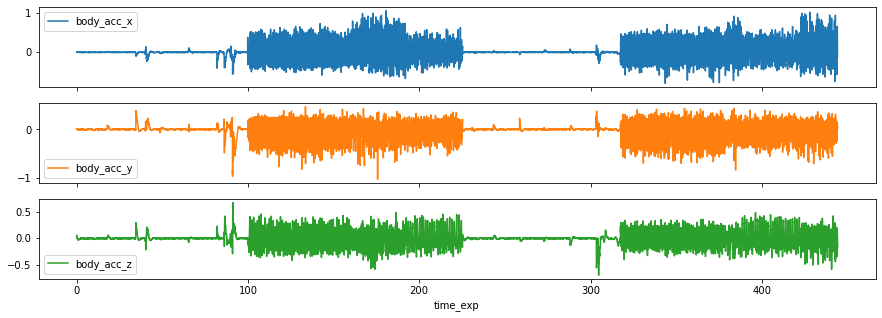

In [9]:
raw_df.query("subject_id == 1") \
    .plot('time_exp', ['body_acc_x', 'body_acc_y', 'body_acc_z'], figsize=(15, 5), subplots=True);

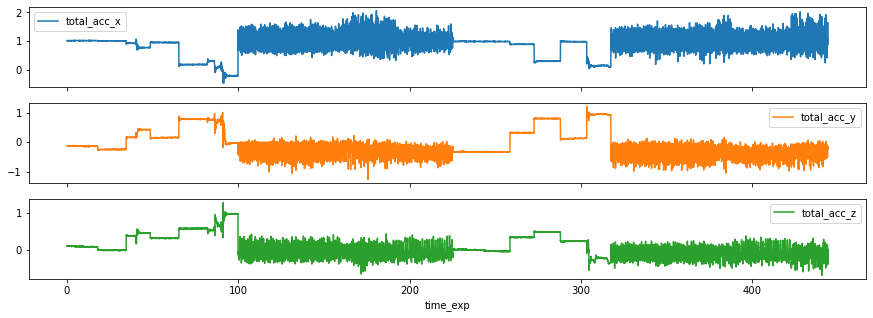

In [11]:
raw_df.query("subject_id == 1") \
    .plot('time_exp', ['total_acc_x', 'total_acc_y', 'total_acc_z'], figsize=(15, 5), subplots=True);

## Histograms of sensor values per activity

The goal is to see a separation between activity types for individual features. Intuitively, we might first look at the body acceleration, jerk, and gyroscope average values. 

Indeed, we see that inactive activities look very different than active ones.
* Inactive activities are sharply peak across all subjects.
* Active activities have a broad distribution but with a rough central peak.
* These observations are valid for all three of the metrics chosen here.

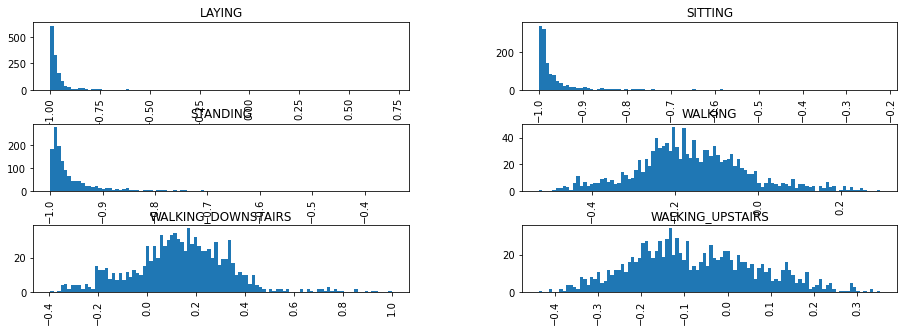

In [120]:
features_df.hist(column='tBodyAccMag-mean()', bins=100, by='activity_name', figsize=(15, 5));

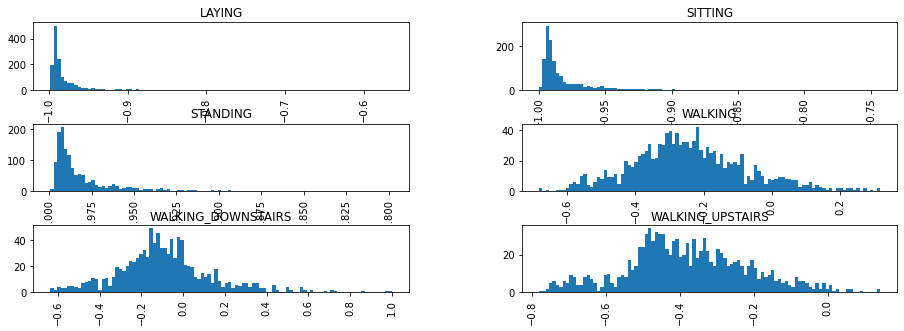

In [121]:
features_df.hist(column='tBodyAccJerkMag-mean()', bins=100, by='activity_name', figsize=(15, 5));

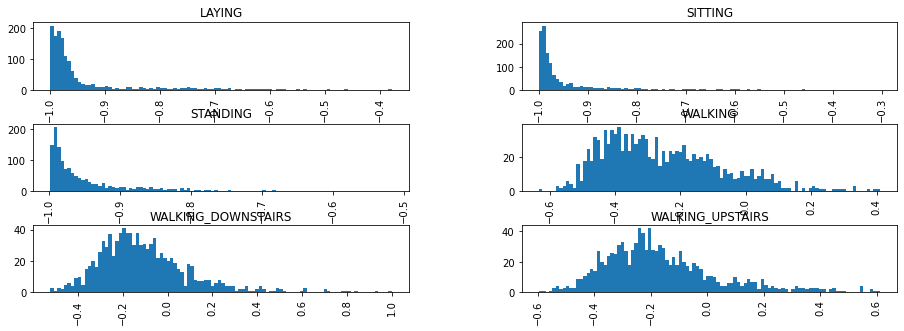

In [122]:
features_df.hist(column='tBodyGyroMag-mean()', bins=100, by='activity_name', figsize=(15, 5));

## Dimensionality reduction

It will be useful to determine if the large features data set can be reduced to a smaller number of reduced features.

### Using PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(features_df.drop(['subject_id', 'time_exp', 'activity_name'], axis=1))
W = pca_fit.components_
pca_10 = pca_fit.transform(features_df.drop(['subject_id', 'time_exp', 'activity_name'], axis=1))

From a linear dimensionality reduction perspective, we see that there is a cluster of features that don't contribute to the overall variance; a relatively fewer number of points are far from the origin.

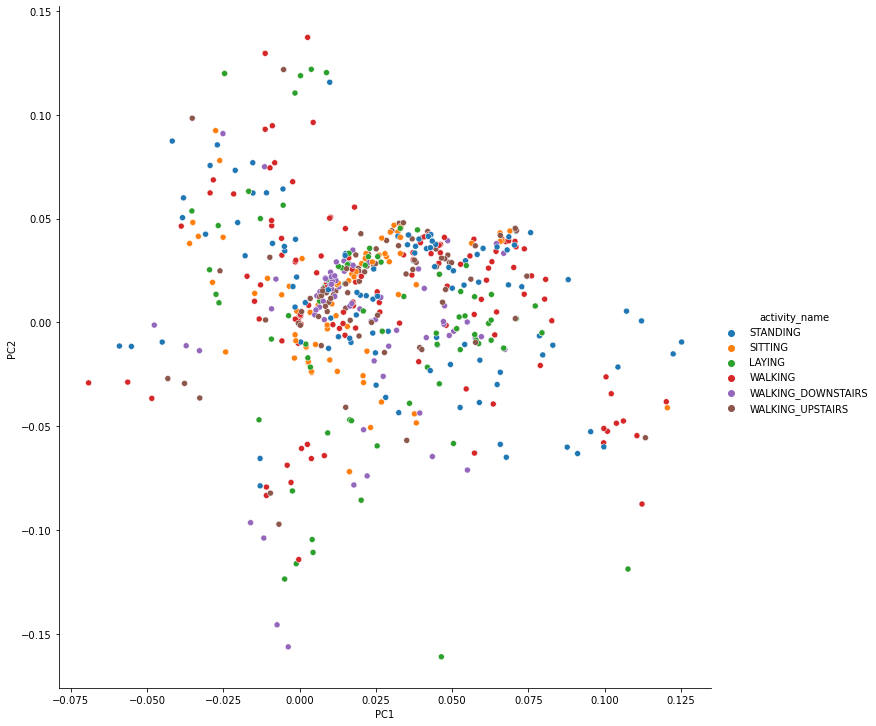

In [110]:
pca_w_2d_df = pd.concat([pd.DataFrame({'PC1': W[0], 'PC2': W[1]}), features_df.activity_name], axis=1)
sns.relplot(data=pca_w_2d_df, x='PC1', y='PC2', hue='activity_name', height=10);

### Via t-SNE

Using t-SNE provides a non-linear approach to reduce the dimensions.

In [94]:
from sklearn.manifold import TSNE
model = TSNE()
tsne_rep = model.fit_transform(features_df.drop(['subject_id', 'time_exp', 'activity_name'], axis=1))
tsne_rep_df = pd.concat([pd.DataFrame(tsne_rep, columns=['x', 'y']), features_df.activity_name], axis=1)

A naive application of t-SNE shows clear separation of points, in fact, there are more finer clusters of activities within the labels we have in the data for walking activities.

We also see that sitting and laying are pretty overlapping, which would make sense due to their very similar nature.

Note that the documentation for `TSNE` recommends applying dimensionality reduction before applying the t-SNE algorithm.

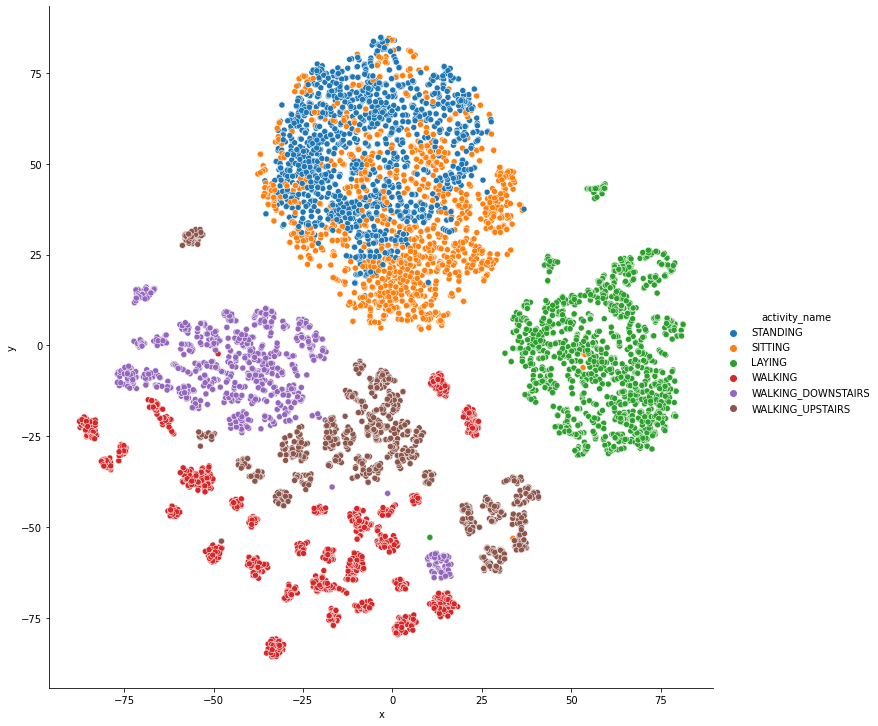

In [102]:
sns.relplot(data=tsne_rep_df, x='x', y='y', hue='activity_name', height=10);